In [46]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

spectrum_filename = "aldebaran_3s_1.bmp"

# Note that the bmp file is not typically the data format one would use in such analyses. As the tutorial notes, one could obtain such an image format or similar from consumer cameras, but
# not research telescopes, which would use a FITS file. The following processing would be the same either way as the data's axes are the same.

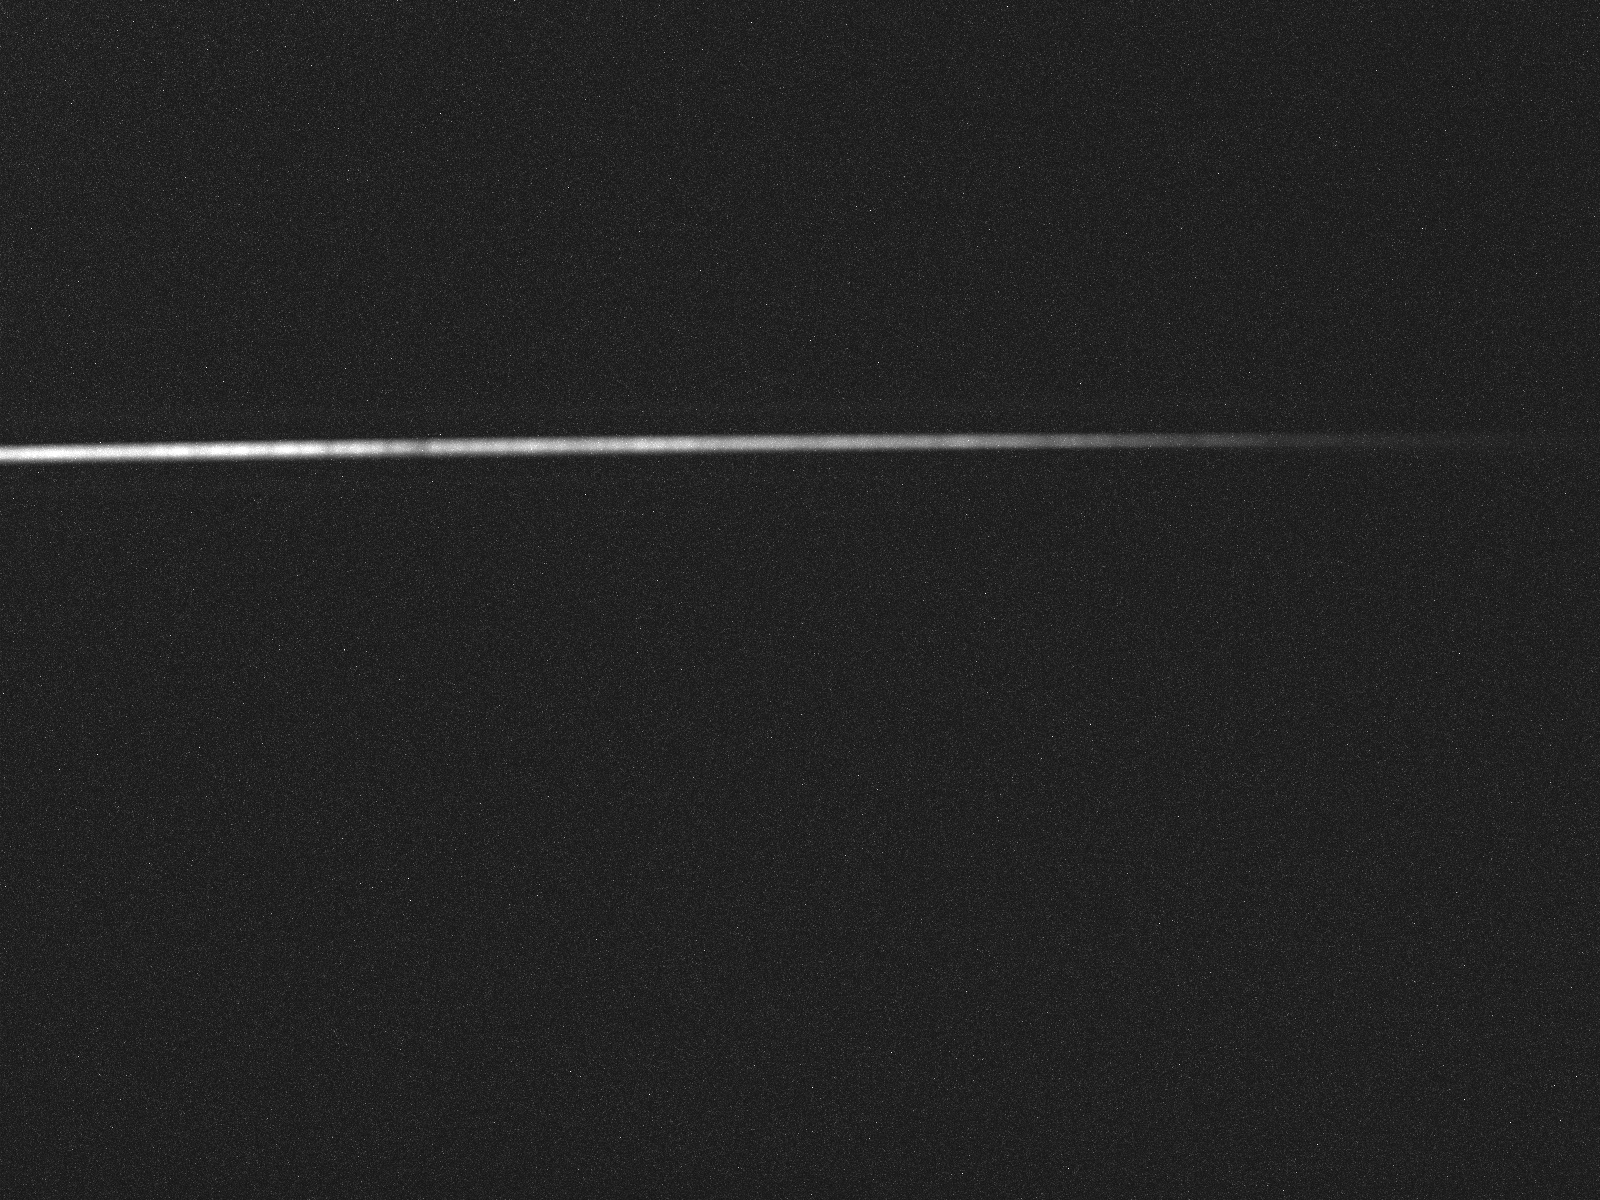

In [47]:
image_data = Image.open(spectrum_filename)
image_data

# The image below is produced by the combination of a slit and a diffration grating. The slit defines the y axis in that it restricts the light coming in to the following grating and hence
# is the determiner of the possible range of the y axis, the spatial axis, of the image. The grating then splits the light by wavelength so that different wavelengths hit the detector at different x.
# The 2D detector is oriented with the slit and the grating such that the y axis only contains spatial information about the source (point-like vs extended) and the x axis contains
# only wavelength information even though it's in a spatial domain. The greyscale then shows counts, amount of light in a given x, y location. More light to the left than to the right.

In [48]:
# Image is in form of 0-255 signifying greyscale values, so can be also represented as an array
image_array = np.array(image_data)
image_array, image_array.shape
# Image is (1200, 1600) pixels

(array([[41, 43, 50, ..., 52, 28, 27],
        [33, 22, 48, ..., 37, 35, 26],
        [41, 64, 30, ..., 21, 30, 33],
        ...,
        [33, 28, 27, ..., 26, 33, 28],
        [35, 25, 23, ..., 23, 46, 46],
        [32, 35, 22, ..., 23, 40, 29]], shape=(1200, 1600), dtype=uint8),
 (1200, 1600))

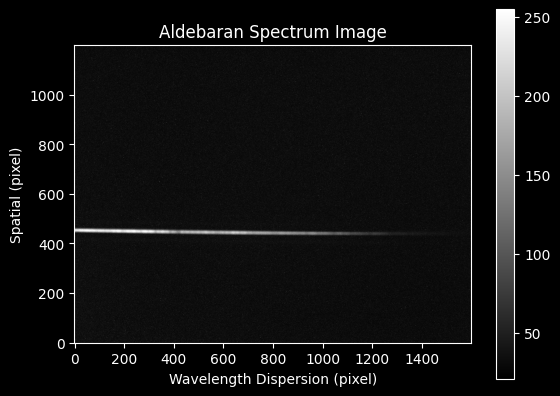

In [49]:
# Make all future plots output with a black background
plt.style.use("dark_background")

# Add axes with CCD bin/pixel values
plt.figure()
plt.imshow(image_array, cmap="gray")

# Semicolon is to suppress text output of adding colorbar to plot
plt.colorbar();

# x axis is wavelength dispersion (splitting red from orange from yellow from ... so on)
# y axis is spatial (depends on shape of observed source)
# gca is "get current axis", so it gets axes of the current figure and applies an axis-specific method to the returned axis objects
plt.gca().invert_yaxis()
plt.xlabel("Wavelength Dispersion (pixel)")
plt.ylabel("Spatial (pixel)")
plt.title("Aldebaran Spectrum Image");

# The x axis is wavelength, greyscale is intensity, and y axis is the light spread over the detector
# Hence, most of the light is in redder wavelengths
# The light is all in the same spot on y axis, so it's a point source.
# An extended source would have light spread out over many pixels in the spatial/y direction


Text(0.5, 1.0, 'Proof to self of why using imshow, not plot')

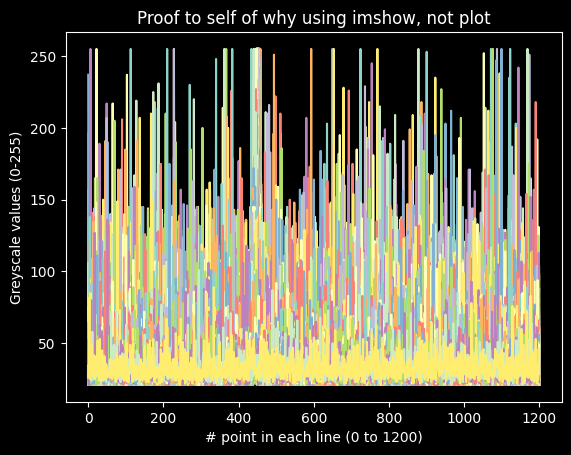

In [50]:
# Got sidetracked: why imshow works while plot doesn't, a proof to myself

plt.figure()
plt.plot(image_array); #< ! does not work
plt.xlabel('# point in each line (0 to 1200)')
plt.ylabel('Greyscale values (0-255)')
plt.title('Proof to self of why using imshow, not plot')

# imshow vs plot: imshow expects a 2D numpy array, so it knows to extract the shape
# of the array to make the axes (in this case 1200x1600). Each value in the array is known to be a color/greyscale value.
# plot expects two 1D arrays of the same length. The first array is the x coordinates, and the second array is the y coordinates.
# When given a 2D array, plot creates a separate dataset for each column. So, I have a 1200x1600 dataset,
# so plot is making 1600 datasets (lines) of length 1200 each (1200 points per line, x axis length), and plotting them all on the same axes.
# The y axis in the plot figure only goes up to 255 because that's the largest value possible in each column of the 2D array.

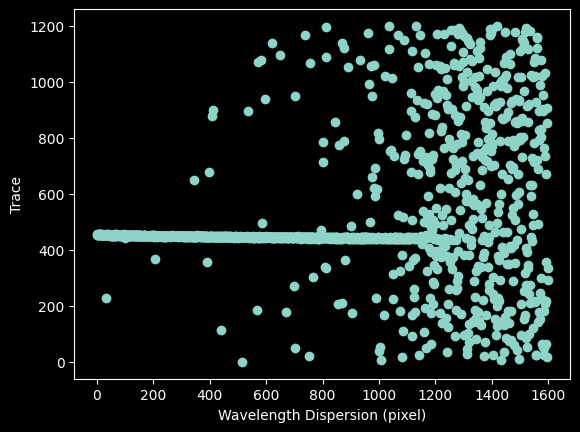

In [51]:
# Create range from 0 to number of columns in image array since imshow generated the pixel axis in
# previous image
xvals = np.arange(image_array.shape[1])
# argmax finds the largest value in the array along a given axis and returns the index 
# of that largest value. axis param: 0 tells argmax to find max value of each column
# (default would flatten array into 1D and find single max value, 1 would find max of each row)
yvals = np.argmax(image_array, axis=0)

plt.plot(xvals, yvals, 'o')
plt.xlabel("Wavelength Dispersion (pixel)")
plt.ylabel("Trace");

# The main goal of the trace is to obtain a model f(x) defining the 
# vertical position of the light (the signal) along the detector. (tutorial)
# f(x) is the ideal, what would be the case if the interfering factors mentioned below weren't present.

# The trace is used to correct for any misalignment between the slit/grating light output and the CCD 
# (caused by atmosphere, instrument manufacturing imprecision, etc) such that
# the information isn't purely spatial in the y axis and purely wavelength in the x axis.

# So why using argmax here? "to obtain the trace, we first measure the y value at each x value"
# -> translating the image into a plot with discrete values since our eyes see the brightest
# points per x value

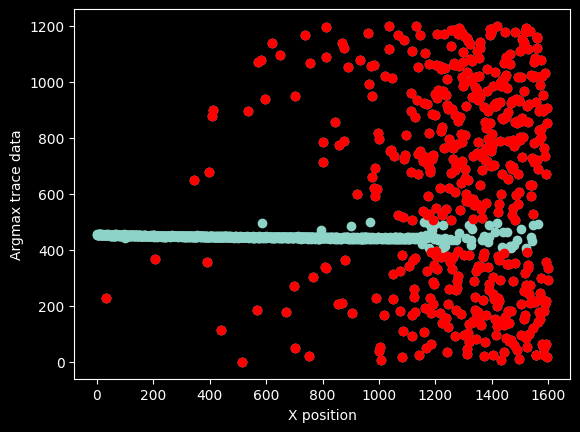

In [52]:
# conditional that says bad is true if yvals less than 400 or greater than 500
bad_pixels = (yvals < 400) | (yvals > 500)

# Plots all points in blue (default)
plt.plot(xvals, yvals, "o")
# Repaints in red over the bad pixels
plt.plot(xvals[bad_pixels], yvals[bad_pixels], "ro")
plt.ylabel("Argmax trace data")
plt.xlabel("X position");

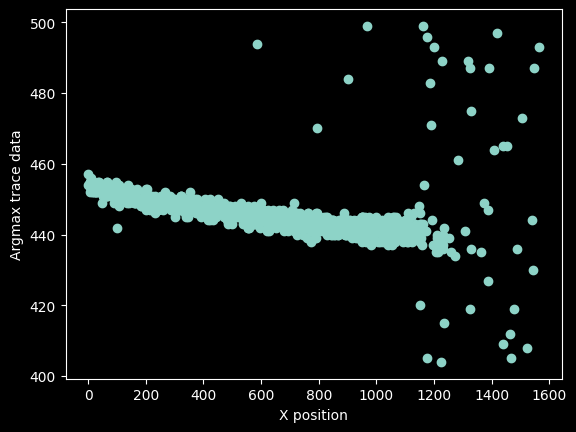

In [53]:
# Tilde is an "invert" operator "in which all the bits of input data are reversed"
# So xvals[bad_pixels] is evaluated then all true and false values are flipped
# Resulting in all good pixels, so don't need to create a separate Boolean to find good pixels

# Sidetrack: The command below inverts the axis values (plots -1600 to 0 on x and -1200 up to 0 on y)
# The bad pixels are found then made negative
#plt.plot(~xvals[bad_pixels], ~yvals[bad_pixels], "o")

# Inverts the boolean condition, so xvals and yvals are indexed for the acceptable pixels
plt.plot(xvals[~bad_pixels], yvals[~bad_pixels], "o")

plt.ylabel("Argmax trace data")
plt.xlabel("X position");

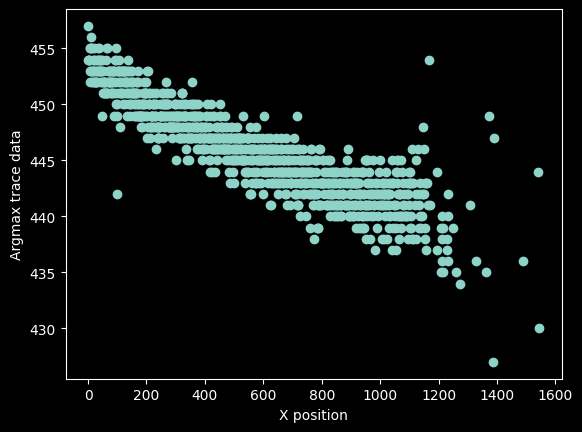

In [54]:
# New search condition
zoomed_bad_pixels = (yvals < 425) | (yvals > 460)

# Repeat plot code
plt.plot(xvals[~zoomed_bad_pixels], yvals[~zoomed_bad_pixels], "o")
plt.ylabel("Argmax trace data")
plt.xlabel("X position");

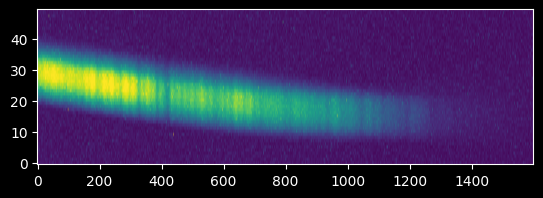

In [55]:
# Indexing 425 to 475 rows because that's range of pixels we like on y axis
# We're referecing y axis for the row index because row indicies match y axis

plt.imshow(image_array[425:475, :])
plt.gca().set_aspect(10)
# Added invert below because it's inverted from tutorial image without it
plt.gca().invert_yaxis()

# Goal achieved with this graph: "Try to find the spine to trace using argmax" (tutorial)

# The drift in this graph from the straight line is what I'm trying to correct using the trace. 
# The star's shape would only cause a thicker or thinner line in the y axis, not a drift.

In [56]:
# Moments: "quantitative measures related to the shape of the function's graph" (Wikipedia)
# mu' = <X^n> = int x^n f(x) dx
# mu: moment
# n: order of the moment
# X: random variable of which taking the moment
# f(x): density function of X

# Zeroth order moment is just integration of density function, so get total of whatever it
# represents (e.g. probability density function gives total probability of 1)

# "We can use moments to provide a different, possibly better, estimate of where the 
# trace’s center is." (tutorial) -> will accomplish the same goal but better than argmax

# "The advantage of moment analysis is that we’re using all of the data to estimate the vertical position, 
# not just the single brightest value, which is what we used above." (tutorial)
# argmax is the single brightest value mentioned above
# Now using all y values corresponding to an x value, which is good if an x value has
# a lot of different bright values

# "The first-order moment is the intensity-weighted mean position" (tutorial). < Explanation for why 
# would think to use a moment here

In [57]:
# "Note that we need to subtract off the background to avoid a bias toward the center, 
# so we use the median of the whole image as our background estimate." (tutorial)

# Why does the background cause a bias toward the center? A non-zero background makes it seem to the
# moment calculation that there is important/relevant but low-level light covering the whole image, 
# when we know that the significant information is only in a small portion of the image due to the
# type of image it is. In another circumstance, it may be valid to leave the background light alone
# if, for example, we knew we were capturing an extended source in an image with purely spatial axes,
# covering the whole FOV. The bias is towards the center because the centroid of the background
# light is the center of the image, as it's uniformly distributed.

# numpy docs for repeat: "repeat each elements of an array after themselves"
# np.repeat(a, repeats, axis)
# a: input array
# repeats: number of repetitions for each element
# axis: axis along which to repeat values
# Returns array with same shape as a except along the given axis

# The function below then is creating a range from 425 to 475 (non-inclusive)
# (See elaboration on the difference adding the [:, None] makes in the other edited cell)
# and repeating it for the number of columns in the image array along axis 1 (columns)

# Not including the [:,None] causes repeat to throw an error "axis 1 is out of 
# bounds for array of dimension 1" <- need to explore this more as to why

# In this case, the number of columns in image_array, and hence the number of repetitions, is 1600
yaxis = np.repeat(np.arange(425, 475)[:, None], image_array.shape[1], axis=1)

# Take median of the whole image as background estimate, median is a scalar float
background = np.median(image_array)

# Takes the average of yaxis array along rows. This is the first-order moment calculation
# where the weights represent the intensity values at each x, y location minus the background.
weighted_yaxis_values = np.average(yaxis, axis=0, weights=image_array[425:475, :] - background)

In [58]:
# Difference between np.arange(425, 475) and np.arange(425, 475)[:, None]

# image_array.shape[1] is 1600, so first way is 1600*50 (length of the range) long. A flat array

print(np.arange(425, 475))
print(np.arange(425, 475).shape)
print(np.repeat(np.arange(425, 475), image_array.shape[1]))#, axis=1)) Can't use axis 1 without [:, None]
print(len(np.repeat(np.arange(425, 475), image_array.shape[1])))

print('--------------')

# Second way is a 50x1 array repeated 1600 times along axis 1 (columns), so results in a 50x1600 array

print(np.arange(425, 475)[:, None])
print(np.arange(425, 475)[:, None].shape)
print(np.repeat(np.arange(425, 475)[:, None], image_array.shape[1], axis=1))
print(np.repeat(np.arange(425, 475)[:, None], image_array.shape[1], axis=1).shape)

[425 426 427 428 429 430 431 432 433 434 435 436 437 438 439 440 441 442
 443 444 445 446 447 448 449 450 451 452 453 454 455 456 457 458 459 460
 461 462 463 464 465 466 467 468 469 470 471 472 473 474]
(50,)
[425 425 425 ... 474 474 474]
80000
--------------
[[425]
 [426]
 [427]
 [428]
 [429]
 [430]
 [431]
 [432]
 [433]
 [434]
 [435]
 [436]
 [437]
 [438]
 [439]
 [440]
 [441]
 [442]
 [443]
 [444]
 [445]
 [446]
 [447]
 [448]
 [449]
 [450]
 [451]
 [452]
 [453]
 [454]
 [455]
 [456]
 [457]
 [458]
 [459]
 [460]
 [461]
 [462]
 [463]
 [464]
 [465]
 [466]
 [467]
 [468]
 [469]
 [470]
 [471]
 [472]
 [473]
 [474]]
(50, 1)
[[425 425 425 ... 425 425 425]
 [426 426 426 ... 426 426 426]
 [427 427 427 ... 427 427 427]
 ...
 [472 472 472 ... 472 472 472]
 [473 473 473 ... 473 473 473]
 [474 474 474 ... 474 474 474]]
(50, 1600)


In [59]:
print(image_array.shape[1])

1600


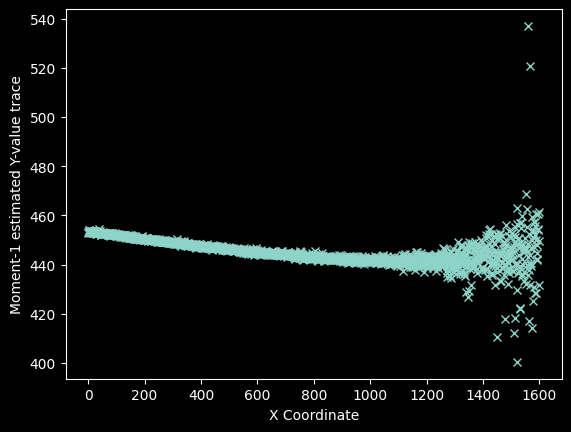

In [60]:
plt.plot(xvals, weighted_yaxis_values, "x")
plt.xlabel("X Coordinate")
plt.ylabel("Moment-1 estimated Y-value trace");

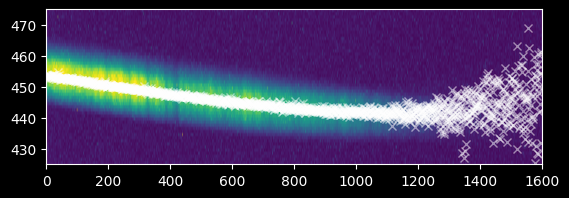

In [61]:
# we need to use the 'extent' keyword to have the axes correctly labeled
plt.imshow(image_array[425:475, :], extent=[0, image_array.shape[1], 425, 475], origin='lower')
# lower needed addition compared to tutorial to flip image on y axis
plt.gca().set_aspect(10)  # we stretch the image out by 10x in the y-direction
plt.plot(xvals, weighted_yaxis_values, "wx", alpha=0.5)
plt.axis((0, 1600, 425, 475));

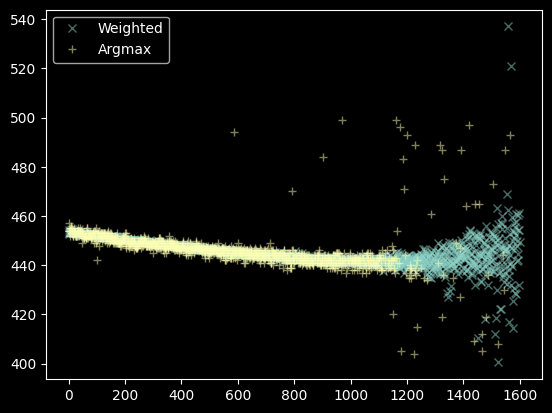

In [62]:
plt.plot(xvals, weighted_yaxis_values, "x", label="Weighted", alpha=0.5)
plt.plot(xvals[~bad_pixels], yvals[~bad_pixels], "+", label="Argmax", alpha=0.5)
plt.legend(loc="best");

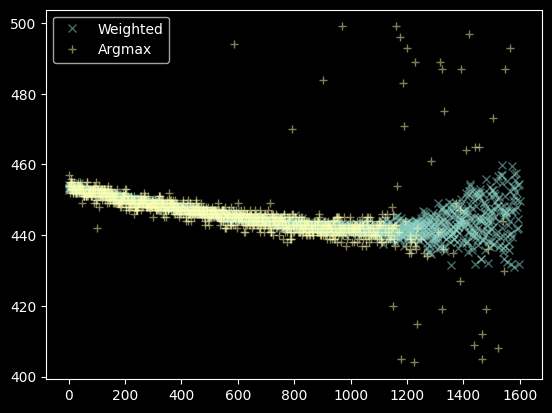

In [63]:
bad_moments = (weighted_yaxis_values > 460) | (weighted_yaxis_values < 430)

plt.plot(
    xvals[~bad_moments],
    weighted_yaxis_values[~bad_moments],
    "x",
    label="Weighted",
    alpha=0.5,
)
plt.plot(xvals[~bad_pixels], yvals[~bad_pixels], "+", label="Argmax", alpha=0.5)
plt.legend(loc="best");